### Kütüphaneleri import et

In [2]:
import cv2
import numpy as np

## Resmim piksellerini okuma ve değiştirme

In [13]:
img=cv2.imread("klon.jpg")

dimension=img.shape # resmin boyutlarını bize verir
print("resmin boyutu: ",dimension)


color=img[420,500] # resimdeki her hangi bir pikselin konumunu veriyoruz
print("piksellerinin renk kodları: ",color) # ve hangi renkleri içerdiğini yazdırıyoruz

blue = img[420,500,0] # [b:0, g:1 , r:2] renk kodları bu şekilde sıralanır ve biz sadece mavi renk kodunun değerini merak ediyoruz.
print(f"pikselindeki mavi renk kodu: {blue} ")

green =img[420,500,1]
print(f"pikselindeki yeşil renk kodu: {green} ")

blue = img[420,500,0]=250 #bir pikseldeki renk kodlarını değiştirme
print("new blue:",img[420,500,0])

blue1=img.item(150,200,0) #150-200 konumundaki mavi rengi alıyoruz.
print("blue1: ",blue1)

img.itemset((150,200,0),172) #pikselin rengini değiştiriyoruz.
print("new_blue1: ",img[150,200,0])

cv2.imshow("klon asker",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

resmin boyutu:  (426, 640, 3)
piksellerinin renk kodları:  [140 134 123]
pikselindeki mavi renk kodu: 140 
pikselindeki yeşil renk kodu: 134 
new blue: 250
blue1:  158
new_blue1:  172


## ROİ (region of interest)

In [15]:
img=cv2.imread("klon.jpg")

roi = img[30:200,200:400] #tahmini olarak ilgili alanın kordinatlarının girilmesi

    
cv2.imshow("klon asker",img)
cv2.imshow("ROI",roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Resimlerin Toplanması

In [26]:
circle = np.zeros((512,512,3),np.uint8)+255 # resim çizilecek tuval oluşturuldu
cv2.circle(circle,(256,256),60,(255,0,0),-1) # çember oluşturuldu

rectangle = np.zeros((512,512,3),np.uint8)+255
cv2.rectangle(rectangle,(150,150),(350,350),(0,0,255),-1)

add = cv2.add(rectangle,circle) # toplanacak iki resmin isimleri giriliyor
cv2.imshow("Add",add)

# f(x,y) = x*a + y*b + c #resimleri belli bir ağırlıkta toplama
dst = cv2.addWeighted(circle,0.7,rectangle,0.3,0)
cv2.imshow("Dst",dst)

cv2.imshow("Rectangle",rectangle)
cv2.imshow("Circle",circle)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Renk Uzayı

In [29]:
img=cv2.imread("klon.jpg")

#RENK UZAYLARI İLE DEĞİŞİKLİKLER 
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

cv2.imshow("klon BGR2RGB",img1)
cv2.imshow("klon BGR2GRAY",img2)
cv2.imshow("klon BGR2HSV",img3)
cv2.imshow("klon asker",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture("antalya.mp4") # pc deki video adını belirttik.

# her bir kare sonsuz bir while döngüsü ile yakalayarak video oluşturuyoruz.
while True:
    ret,frame = cap.read() # cap.read() sağlıklı bi şekilde görüntü okuduğunda true değerleri göndererek ret hafızasında saklanır
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    #video bittiğinde ret de False dönecek ve sağlıklı bi şekide videodan çıkabileceğiz bunuda if komutu ile algıladık
    if ret==False:
        break
        
    
    cv2.imshow("Antalya",frame)
    
    #burada waitkey içine girlen sayı her bir karenin kaç milisaniye gösterileceğidir
    if cv2.waitKey(10) & 0xFF == ord("q"): #0xFF q'nun makine dilinde ki karşılığıdır
        break
cap.release() 
cv2.destroyAllWindows()

## Renklerin HSV kodlarını bulma

> #### HSV renk alanı
HSV (ton, doygunluk, değer) renk alanı, RGB renk modeline benzer renk uzayını temsil eden bir modeldir. Ton kanalı renk türünü modellediğinden, nesneleri rengine göre bölümlere ayırması gereken görüntü işleme görevlerinde çok kullanışlıdır. Doygunluğun değişimi, doymamıştan gri tonlarını ve tamamen doygunluğu temsil eder (beyaz bileşen yok). Değer kanalı, rengin parlaklığını veya yoğunluğunu tanımlar. Sonraki resim HSV silindirini göstermektedir.

In [2]:
import requests
import cv2
import numpy as np
#telefonun kamerasına bağlanıyoruz
#url = "http://192.168.137.13:8080//shot.jpg"

cap = cv2.VideoCapture(0) # videocaptura sıfır diyerek kameradan görüntü alacağımızı belirtilir


def nothing(x):
        
        pass
    
cv2.namedWindow("Trackbar") # yeniden adlandırıldı
cv2.resizeWindow ("Trackbar",500,500)

cv2.createTrackbar("lower - H","Trackbar",0,180,nothing) # trackbara tuşlar ve görevler atandı
cv2.createTrackbar("lower - S","Trackbar",0,255,nothing) # adı G ve değişim aralığı 0-255
cv2.createTrackbar("lower - V","Trackbar",0,255,nothing)

cv2.createTrackbar("upper - H","Trackbar",0,180,nothing)
cv2.createTrackbar("upper - S","Trackbar",0,255,nothing)
cv2.createTrackbar("upper - V","Trackbar",0,255,nothing)

cv2.setTrackbarPos("upper - H","Trackbar",180)
cv2.setTrackbarPos("upper - S","Trackbar",255)
cv2.setTrackbarPos("upper - V","Trackbar",255)


# her bir kare sonsuz bir while döngüsü ile yakalayarak video oluşturuyoruz.
while True:
    #img_resp = requests.get(url) # Url'ye istek gönderiyoruz ve url'den görüntüleri alıyoruz
    #img_arr = np.array(bytearray(img_resp.content), dtype = np.uint8) #array olarak dönüştürüyoruz
    #img = cv2.imdecode(img_arr,cv2.IMREAD_COLOR) 
    #img = cv2.resize(img,(640,480))
    ret,frame = cap.read() # cap.read() sağlıklı bi şekilde görüntü okuduğunda true değerleri göndererek ret hafızasında saklanır
    
    #flipcode = 0: flip vertically
    #flipcode > 0: flip horizontally
    #flipcode < 0: flip vertically and horizontally
    
    frame = cv2.flip(frame,1)  #cv2.flip kodu ile görüntünün eksenlere göre tersini alabiliriz
    
    frame_hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    lower_h = cv2.getTrackbarPos("lower - H","Trackbar") #tuşlara atadığımız özellikleri ekrana atıyoruz
    lower_s = cv2.getTrackbarPos("lower - S","Trackbar")
    lower_v = cv2.getTrackbarPos("lower - V","Trackbar")
    
    upper_h = cv2.getTrackbarPos("upper - H","Trackbar")
    upper_s = cv2.getTrackbarPos("upper - S","Trackbar")
    upper_v = cv2.getTrackbarPos("upper - V","Trackbar")
    
    lower_color = np.array([lower_h,lower_s,lower_v])
    upper_color = np.array([upper_h,upper_s,upper_v])
    
    mask = cv2.inRange(frame_hsv,lower_color,upper_color)
    
    
    cv2.imshow("Original",frame)
    cv2.imshow("Mask",mask)
    
    #burada waitkey içine girlen sayı her bir karenin kaç milisaniye gösterileceğidir
    if cv2.waitKey(1) & 0xFF == ord("q"): #0xFF q'nun makine dilinde ki karşılığıdır
        break

cap.release() 
cv2.destroyAllWindows()

## Smoothing Resmi yumuşatma

In [7]:
img_filter = cv2.imread("8.2 filter.png.png")
img_median = cv2.imread("8.1 median.png.png")
img_bilateral = cv2.imread("8.4 bilateral.png.png")

blur = cv2.blur(img_filter,(5,5))
blur2 = cv2.GaussianBlur(img_filter,(5,5),cv2.BORDER_DEFAULT)
median = cv2.medianBlur(img_median,5)
blur_b = cv2.bilateralFilter(img_bilateral,9,98,95)

cv2.imshow("blur",blur)
cv2.imshow("GaussianBlur",blur2)
cv2.imshow("medianBlur",median)
cv2.imshow("bilateralFilter",blur_b)


cv2.imshow("original filter",img_filter)
cv2.imshow("original median",img_median)
cv2.imshow("original bilateral",img_bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Bitwise işleçler

In [15]:
img1 = cv2.imread("9.2 bitwise_1.png.png")
img2 = cv2.imread("9.1 bitwise_2.png.png")

bit_and = cv2.bitwise_and(img1,img2) # bit düzeyinde and işlemleri yapar
bit_or = cv2.bitwise_or(img1,img2)  # bit düzeyinde or işlemleri yapar
bit_not = cv2.bitwise_not( img2)
bit_xor = cv2.bitwise_xor(img1,img2)
 
cv2.imshow("bitwise",bit_xor)

cv2.imshow("original img1",img1)
cv2.imshow("original img2",img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Resim dönüşüm dizeyi (Matris)

In [29]:
img = cv2.imread("car.png")
row,col = img.shape[:2]


M = np.float32([[1,0,10],[0,1,100]])
dst = cv2.warpAffine(img,M,(row,col))

print("Row: ",row)
print("Col: ",col)
cv2.imshow("original img",img)
cv2.imshow("dst",dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

Row:  205
Col:  570


## Resim döndürme

In [42]:
img = cv2.imread("car.png")
row,col = img.shape[:2]


M = cv2.getRotationMatrix2D((col/3,row/1),180,1) #sütun,satır,açı,hangi yönde döndürmek istediğimiz,ölçek

dst = cv2.warpAffine(img,M,(row,col)) # (resim,filtre,sütun,satır)

cv2.imshow("dst",dst)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Thereshold (siyah-beyaz)

In [68]:
img = cv2.imread("resim1.PNG",0) # GÖRÜNTÜ GRAYSCALE ÇEVRİLDİ

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

cv2.imshow("img",img)
cv2.imshow("th1",th1)
cv2.imshow("th2",th2)
cv2.imshow("th3",th3)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Morfolojik işlemler

In [73]:
img = cv2.imread("resim1.PNG",0) # GÖRÜNTÜ GRAYSCALE ÇEVRİLDİ
ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8) # (5,5 )lik matris

erosion = cv2.erode(img,kernel,iterations=2) #siyahları kalınlaştırıyor

dilation = cv2.dilate(img,kernel,iterations=2) # beyazları kalınlaştıryor

opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel) #resim üzerindeki lekleri kaldırmamıza yarar

close = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel) #resim üzerindeki lekleri kaldırmamıza yarar

gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel) #resim üzerindeki lekleri kaldırmamıza yarar

tophat = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel) #resim üzerindeki lekleri kaldırmamıza yarar


cv2.imshow("tophat",tophat)
cv2.imshow("gradient",gradient)
cv2.imshow("close",close)
cv2.imshow("opening",opening)
cv2.imshow("dilation",dilation)
cv2.imshow("erosion",erosion)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Histogram

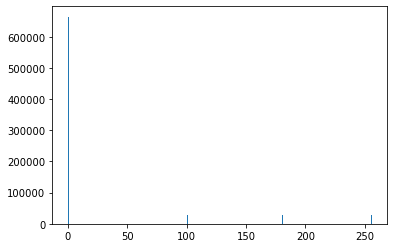

In [83]:
#görüntü hakkında parlaklık ,constrat vs gibi bilgileri elde etmemizi sağlar
from matplotlib import pyplot as plt

img = np.zeros((500,500,3),np.uint8) #kendimize 500, 500 bir siyah ekran yaptık
cv2.rectangle(img,(0,60),(200,150),(255,100,180),-1)
cv2.rectangle(img,(200,200),(300,300),(255,100,180),-1)

cv2.imshow("img",img)
plt.hist(img.ravel(),256,[0,256])
plt.show()


cv2.waitKey(0)
cv2.destroyAllWindows()

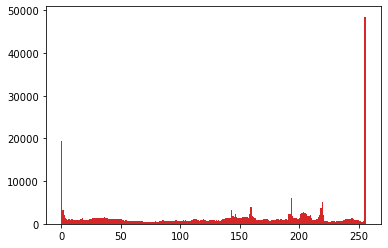

In [100]:
#görüntü hakkında parlaklık ,constrat vs gibi bilgileri elde etmemizi sağlar
from matplotlib import pyplot as plt

img = cv2.imread("car.png")
b,g,r = cv2.split(img) #resmin b , g, r değerlerini ayrı ayrı elde etmemizi sağlar

plt.hist(b.ravel(),256,[0,256])
plt.hist(g.ravel(),256,[0,256])
plt.hist(r.ravel(),256,[0,256])




cv2.imshow("img",img)
plt.hist(img.ravel(),256,[0,256])
plt.show()


cv2.waitKey(0)
cv2.destroyAllWindows()

## Köşe tespit etme

In [99]:
img1 = cv2.imread("15.1 text.png.png")
img2 = cv2.imread("15.2 contour.png.png")

gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray,50,0.01,10)

corners = np.int0(corners)
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img2,(x,y),3,(0,0,255),-1)
    
cv2.imshow("corner",img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Canny edge Kenar Bulma yöntemi

In [111]:
cap = cv2.VideoCapture(0) # videocaptura sıfır diyerek kameradan görüntü alacağımızı belirtilir

# her bir kare sonsuz bir while döngüsü ile yakalayarak video oluşturuyoruz.
while True:
    ret,frame = cap.read() # cap.read() sağlıklı bi şekilde görüntü okuduğunda true değerleri göndererek ret hafızasında saklanır
    
    #flipcode = 0: flip vertically
    #flipcode > 0: flip horizontally
    #flipcode < 0: flip vertically and horizontally
    
    frame = cv2.flip(frame,1)  #cv2.flip kodu ile görüntünün eksenlere göre tersini alabiliriz
    
    edges = cv2.Canny(frame,70,55)
    
    #cv2.imshow("webcam",frame)
    cv2.imshow("Canny edge",edges) #kenar bulma modülü
    cv2.imshow("original",frame)
    
    #burada waitkey içine girlen sayı her bir karenin kaç milisaniye gösterileceğidir
    if cv2.waitKey(1) & 0xFF == ord("q"): #0xFF q'nun makine dilinde ki karşılığıdır
        break
cap.release() 
cv2.destroyAllWindows()

# Tracbar ve Canny edges ile kameradan alınan görünütünün kenarlarını bulma

In [ ]:
import requests
import cv2


cap = cv2.VideoCapture(0) # videocaptura sıfır diyerek kameradan görüntü alacağımızı belirtilir


def nothing(x):
        
        pass
    
cv2.namedWindow("Trackbar") # yeniden adlandırıldı
cv2.resizeWindow ("Trackbar",500,85)


cv2.createTrackbar("a","Trackbar",0,255,nothing) 
cv2.createTrackbar("b","Trackbar",0,255,nothing)




# her bir kare sonsuz bir while döngüsü ile yakalayarak video oluşturuyoruz.
while True:
  
    ret,frame = cap.read() # cap.read() sağlıklı bi şekilde görüntü okuduğunda true değerleri göndererek ret hafızasında saklanır
    
    #flipcode = 0: flip vertically
    #flipcode > 0: flip horizontally
    #flipcode < 0: flip vertically and horizontally
    
    frame = cv2.flip(frame,1)  #cv2.flip kodu ile görüntünün eksenlere göre tersini alabiliriz
    
    
    
    a = cv2.getTrackbarPos("a","Trackbar") #tuşlara atadığımız özellikleri ekrana atıyoruz
    b = cv2.getTrackbarPos("b","Trackbar")
   
    edges = cv2.Canny(frame,a,b)
   
    
    cv2.imshow("Original",frame)
    cv2.imshow("Mask",edges)
    
    #burada waitkey içine girlen sayı her bir karenin kaç milisaniye gösterileceğidir
    if cv2.waitKey(1) & 0xFF == ord("q"): #0xFF q'nun makine dilinde ki karşılığıdır
        break

cap.release() 
cv2.destroyAllWindows()

In [2]:
import requests
import cv2


img = cv2.imread("resimler/plaka.jpg") # videocaptura sıfır diyerek kameradan görüntü alacağımızı belirtilir
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Gri tona çevirdik

def nothing(x):
        
        pass
    
cv2.namedWindow("Trackbar") # yeniden adlandırıldı
cv2.resizeWindow ("Trackbar",500,300)


cv2.createTrackbar("a","Trackbar",0,400,nothing) 
cv2.createTrackbar("b","Trackbar",0,400,nothing)

cv2.createTrackbar("d","Trackbar",0,19,nothing)
cv2.createTrackbar("sigmaC","Trackbar",0,500,nothing)
cv2.createTrackbar("sigmaS","Trackbar",0,500,nothing)


while True:
    
    a = cv2.getTrackbarPos("a","Trackbar") #tuşlara atadığımız özellikleri ekrana atıyoruz
    b = cv2.getTrackbarPos("b","Trackbar")

    d = cv2.getTrackbarPos("d","Trackbar")
    sigmaC = cv2.getTrackbarPos("sigmaC","Trackbar")
    sigmaS = cv2.getTrackbarPos("sigmaS","Trackbar")
    
    filtered = cv2.bilateralFilter(gray,d,sigmaC,sigmaS)
    
  
    edges = cv2.Canny(filtered,a,b)
   
    cv2.imshow("Trackbar",edges)
    if cv2.waitKey(40)==27: #esc basıldığında pencereyi kapat
        break
cv2.destroyAllWindows()